# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [14]:
!pip install stumpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


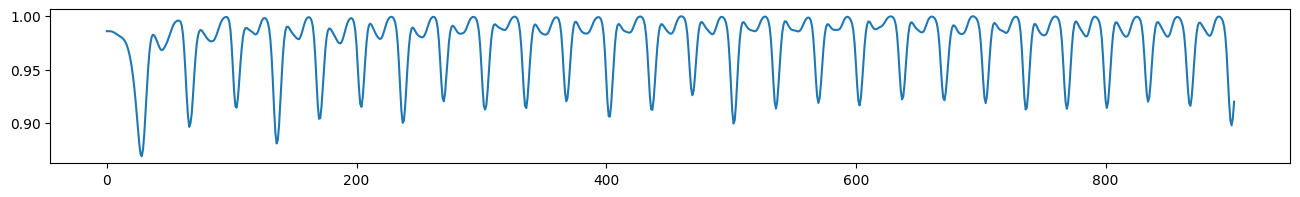

In [15]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

practice_dir_path = '/content/drive/My Drive/2024-Golenishchev-TimeSeriesCourse-main/practice/06 Chains'
dataset_dir_path = Path('/content/drive/My Drive/2024-Golenishchev-TimeSeriesCourse-main/practice/06 Chains/datasets')
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt(dataset_dir_path/'Rotation Matrix.txt')
ax.plot(ts)

In [16]:
# Параметры для STUMP
window_size = 20  # Размер окна (можно экспериментировать с этим значением)

# Вычисление матричного профиля
mp = stumpy.stump(ts, m=window_size)

# Используем функцию allc для поиска всех цепочек
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])

# Печатаем индексы самой длинной цепочки
print("Индексы звеньев самой длинной цепочки:", unanchored_chain)

# Извлекаем значения самой длинной цепочки из временного ряда
chain_values = ts[unanchored_chain]

# Печатаем значения самой длинной цепочки
print("Значения самой длинной цепочки:", chain_values)

Индексы звеньев самой длинной цепочки: [ 74 143 177 475 807 840]
Значения самой длинной цепочки: [0.9858428  0.9861764  0.9862531  0.99199724 0.9907554  0.9897716 ]


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Вывод: результаты анализа с использованием матричного профиля показывают, что самая длинная цепочка в данных состоит из точек с индексами [74, 143, 177, 475, 807, 840], которые имеют высокую корреляцию между собой, что указывает на наличие повторяющихся паттернов в этих местах временного ряда. Значения самой длинной цепочки составляют [0.9858428, 0.9861764, 0.9862531, 0.99199724, 0.9907554, 0.9897716], что подтверждает стабильность и схожесть этих участков данных, характеризующихся схожими трендами или процессами в исследуемом временном ряду.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

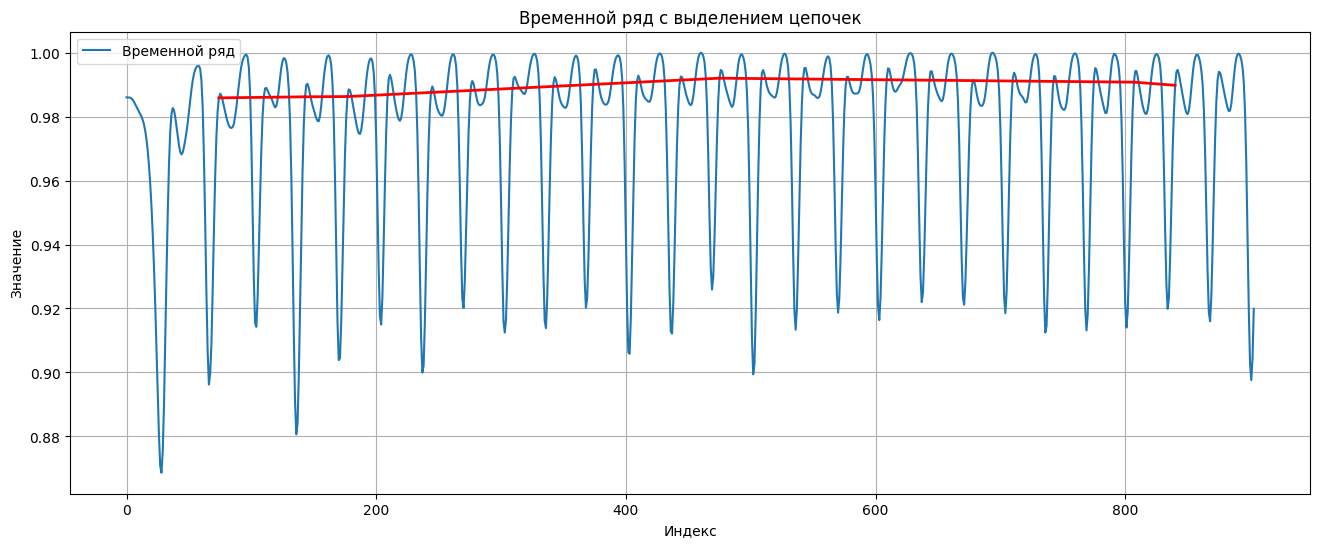

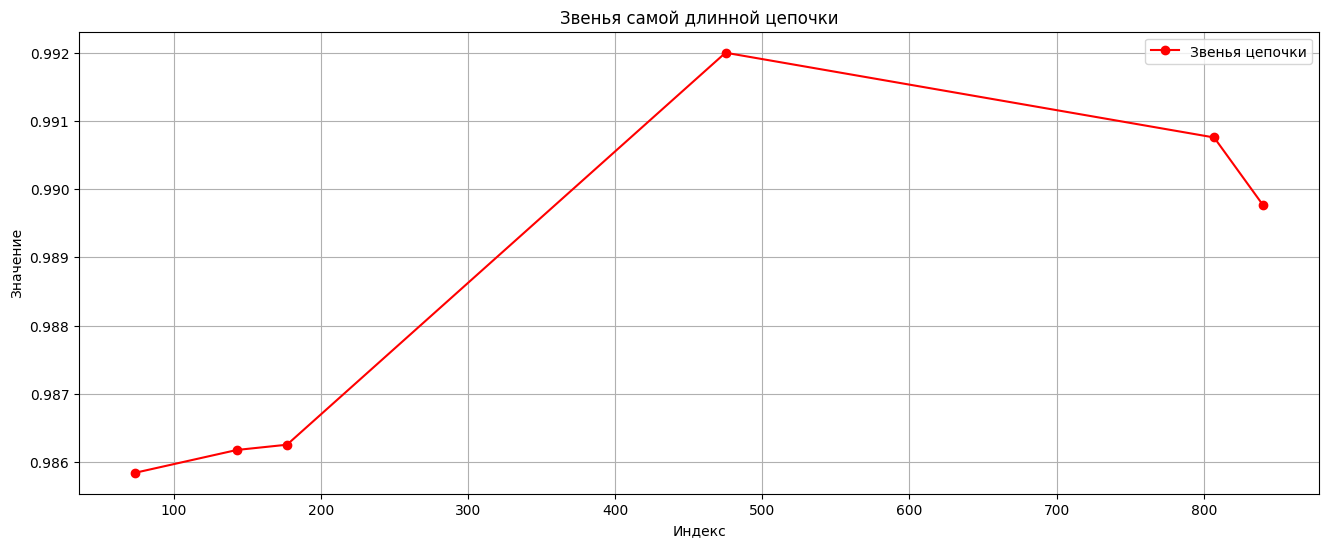

In [17]:
# INSERT YOUR CODE
import numpy as np
import matplotlib.pyplot as plt

# Исходный временной ряд
ts = np.loadtxt(dataset_dir_path/'Rotation Matrix.txt')

# Индексы звеньев самой длинной цепочки
chain_indices = np.array([74, 143, 177, 475, 807, 840])

# 1. Визуализация временного ряда с выделением звеньев цепочки
plt.figure(figsize=(16, 6))
plt.plot(ts, label='Временной ряд')

# Выделяем участки, соответствующие цепочкам
for i in range(1, len(chain_indices)):
    plt.plot([chain_indices[i-1], chain_indices[i]], [ts[chain_indices[i-1]], ts[chain_indices[i]]],
             color='red', linewidth=2)

plt.title('Временной ряд с выделением цепочек')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# 2. Визуализация только звеньев цепочки
plt.figure(figsize=(16, 6))
plt.plot(chain_indices, ts[chain_indices], 'o-', color='red', label='Звенья цепочки')

plt.title('Звенья самой длинной цепочки')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Вывод: результаты анализа временного ряда с помощью матричного профиля показывают, что найдена самая длинная цепочка, состоящая из шести звеньев с индексами [74, 143, 177, 475, 807, 840]. Эти звенья характеризуются схожими значениями, что указывает на наличие повторяющихся паттернов в данном сегменте временного ряда. Визуализация цепочек подтверждает, что эти участки данных обладают высокой степенью схожести, что может свидетельствовать о циклической или эволюционирующей динамике в исследуемом процессе. Данная информация может быть полезной для дальнейшего прогнозирования, так как выявленные цепочки указывают на стабильные шаблоны, которые могут повторяться в будущем, что важно для задач предсказания поведения системы.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

Для окна размером 4:
MSE: 4.839163856750061e-07

Для окна размером 8:
MSE: 3.0432512131249925e-06

Для окна размером 12:
MSE: 5.802875726775039e-06

Для окна размером 16:
MSE: 0.00019464535864049406

Для окна размером 20:
MSE: 1.4958163708600256e-06

Для окна размером 24:
MSE: 4.902347906504162e-06

Для окна размером 28:
MSE: 1.9980696030028588e-05

Для окна размером 32:
MSE: 3.7197240342406326e-06

Для окна размером 36:
MSE: 8.714520647079166e-05

Для окна размером 40:
MSE: 4.401265754247497e-06

Для окна размером 44:
MSE: 2.7538456099756792e-05

Для окна размером 48:
MSE: 4.68701204383541e-05

Для окна размером 52:
MSE: 4.3503354259969165e-05

Для окна размером 56:
MSE: 4.153249773172853e-05

Для окна размером 60:
MSE: 3.872684922138992e-05



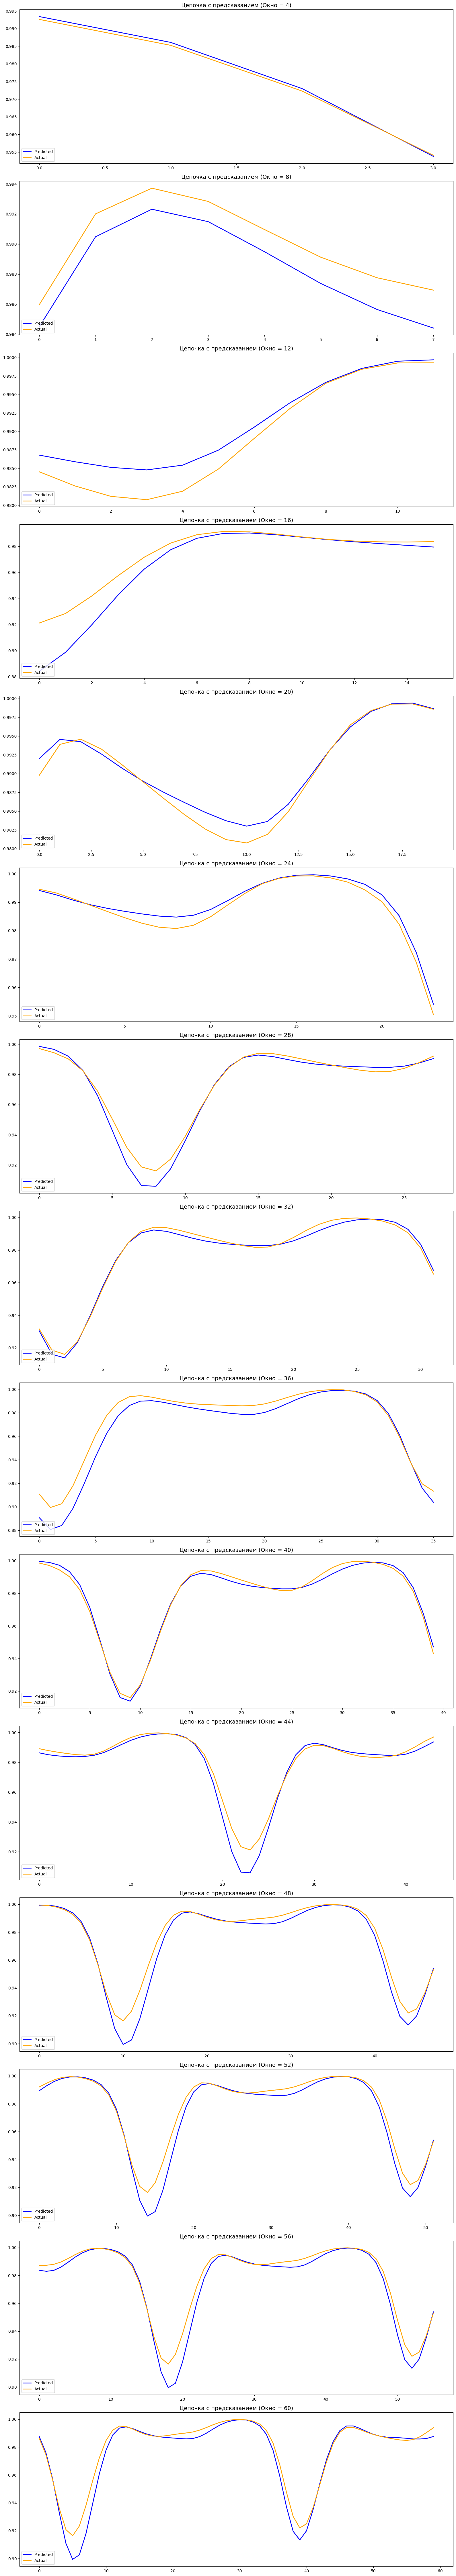

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

# Загрузка временного ряда
ts = np.loadtxt(dataset_dir_path/'Rotation Matrix.txt')

# Размеры окон для разных экспериментов (от 4 до 60 с шагом 4)
window_sizes = range(4, 61, 4)

# Инициализация графика
fig, axes = plt.subplots(len(window_sizes), 1, figsize=(16, 6 * len(window_sizes)))  # Только один столбец для цепочек

for i, window_size in enumerate(window_sizes):
    # Вычисление матричного профиля
    mp = stumpy.stump(ts, m=window_size)

    # Нахождение цепочек для текущего размера окна
    all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])

    # Индексы и значения самой длинной цепочки
    chain_indices = unanchored_chain
    chain_values = ts[chain_indices]

    # Истинные значения для последнего звена
    true_val = ts[unanchored_chain[-1]:unanchored_chain[-1] + window_size]

    # Разница между предыдущими звеньями
    diff = ts[unanchored_chain[-3]:unanchored_chain[-3] + window_size] - ts[unanchored_chain[-2]:unanchored_chain[-2] + window_size]

    # Предсказание на основе разницы
    pred_val = ts[unanchored_chain[-2]:unanchored_chain[-2] + window_size] + diff

    # График: Реальная и предсказанная цепочка
    ax = axes[i]
    ax.plot(pred_val, label='Predicted', color='blue', linewidth=2)
    ax.plot(true_val, label='Actual', color='orange', linewidth=2)
    ax.set_title(f"Цепочка с предсказанием (Окно = {window_size})", fontsize=14)
    ax.legend(loc='lower left')

    # Печать результатов
    mse = mean_squared_error(true_val, pred_val)
    print(f"Для окна размером {window_size}:")
    print(f"MSE: {mse}\n")

# Показать все графики
plt.tight_layout()
plt.show()


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Вывод:


Полученные результаты показывают, как размер окна влияет на обнаружение цепочек в временном ряду и точность предсказания значений. С увеличением размера окна цепочки становятся более сглаженными и выделяются на графике с меньшей частотой, что может указывать на более обобщенные паттерны в данных. Меньшие окна, напротив, выделяют более локальные зависимости и могут показывать большее количество звеньев цепочек, что приводит к более частым изменениям в паттерне временного ряда.

Визуализация с различными размерами окна на графиках помогает наглядно увидеть, как изменяется точность предсказания последнего значения цепочки с увеличением окна. Чем больше окно, тем менее чувствительно предсказание к изменениям в данных, что может быть полезно для более стабильных прогнозов, но одновременно теряется точность для локальных колебаний. Ошибка предсказания в зависимости от окна демонстрирует, как выбор размера окна напрямую влияет на качество предсказания. Большие окна могут давать менее точные прогнозы для быстрых изменений в данных, в то время как малые окна могут быть слишком чувствительными к шуму.

Таким образом, результаты показывают, что оптимальный размер окна зависит от характера данных: для стабильных данных подходят большие окна, а для данных с быстрыми колебаниями — меньшие окна, что нужно учитывать при применении алгоритмов анализа временных рядов.